In [1]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt

# 高斯噪声
def gaussian_noise(img, miu, sigma):

    # 灰度标准化
    img = np.array(img/255, dtype=float)
    # 高斯分布
    noise = np.random.normal(miu, sigma, img.shape)
    # 图像与噪声叠加
    gaussianImg = img + noise
    # 小于0的值设置为0 大于255的值设置为255
    gaussianImg = np.clip(gaussianImg, 0, 1)
    # 恢复原本的图
    gaussianImg = np.uint8(gaussianImg * 255)

    return gaussianImg

# 脉冲噪声 prob：概率
def saltAndPepper_noise(img, prob):
    
    spImg = np.zeros(img.shape, np.uint8)
    thres = 1 - prob

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rNum = random.random() 
            # 添加黑点，即椒噪声
            if rNum < prob:
                spImg[i][j] = 0
            # 添加白点，即盐噪声
            elif rNum > thres:
                spImg[i][j] = 255
            else:
                spImg[i][j] = img[i][j]

    return spImg

# USM锐化
def USM(img):
    blur_img = cv2.GaussianBlur(img, (0, 0), 5)
    img = cv2.addWeighted(img, 1.5, blur_img, -0.5, gamma=0)
    return img

img_file = "C:/Users/looik/Downloads/Attachment/Attachment/Attachment 1/8.jpg"
img = cv2.imread(img_file)[:,:,::-1]

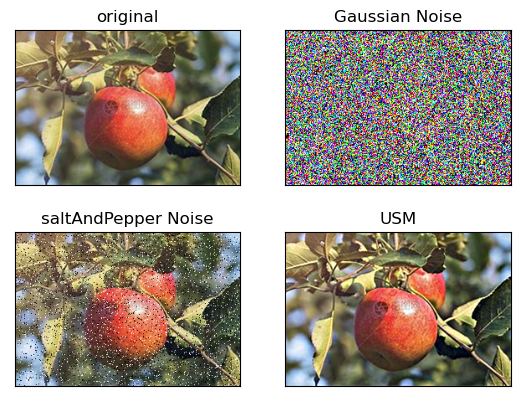

In [3]:
plt.subplot(221)
plt.title("original")
plt.xticks([])
plt.yticks([])
plt.imshow(img)

plt.subplot(222)
plt.title("Gaussian Noise")
plt.xticks([])
plt.yticks([])
plt.imshow(gaussian_noise(img,0,5))

plt.subplot(223)
plt.title("saltAndPepper Noise")
plt.xticks([])
plt.yticks([])
plt.imshow(saltAndPepper_noise(img,0.05))

plt.subplot(224)
plt.title("USM")
plt.xticks([])
plt.yticks([])
plt.imshow(USM(img))

plt.show()